<a href="https://colab.research.google.com/github/paruldiwakar/ML-DL/blob/master/RNN(Movie_Review).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import imdb

((XT,YT),(Xt,Yt)) = imdb.load_data(num_words=10000)

In [0]:
len(XT),len(Xt)

(25000, 25000)

In [0]:
word_idx = imdb.get_word_index() # we can get the vocab for our imbd dataset

In [0]:
idx_word = dict([value,key] for (key,value) in word_idx.items())
idx_word

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [0]:
#code to show 1st review

idx_word = dict([value,key] for (key,value) in word_idx.items())
actual_review = ' '.join([idx_word.get(idx-3,'?') for idx in XT[0]])
print(actual_review)
print(len(actual_review.split()))

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [0]:

# create a 2d tensor for embedding function
from keras.preprocessing import sequence

X_train = sequence.pad_sequences(XT,maxlen=500)
X_test = sequence.pad_sequences(Xt,maxlen=500)

In [0]:

X_train.shape,X_test.shape

((25000, 500), (25000, 500))

In [0]:
# Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,SimpleRNN,Dense

model = Sequential()
model.add(Embedding(10000,64))
model.add(SimpleRNN(32)) # 32(units) is the dimension of the activation/ context vector
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 32)                3104      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 643,137
Trainable params: 643,137
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
checkpoint = ModelCheckpoint("best_model.h5", monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)

earlystopping = EarlyStopping(monitor='val_acc',patience=1)

hist = model.fit(X_train,YT,validation_split=0.2,epochs=4,batch_size=128,callbacks=[checkpoint,earlystopping])

Epoch 1/4
157/157 [==============================] - 80s 512ms/step - loss: 0.2384 - acc: 0.9094 - val_loss: 0.3694 - val_acc: 0.8422
Epoch 2/4
157/157 [==============================] - 80s 509ms/step - loss: 0.1520 - acc: 0.9444 - val_loss: 0.3936 - val_acc: 0.8484
Epoch 3/4
157/157 [==============================] - 80s 511ms/step - loss: 0.0866 - acc: 0.9727 - val_loss: 0.4681 - val_acc: 0.8564
Epoch 4/4
157/157 [==============================] - 81s 515ms/step - loss: 0.0530 - acc: 0.9844 - val_loss: 0.6860 - val_acc: 0.7618


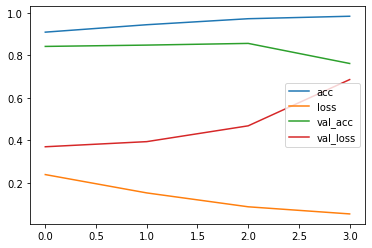

In [0]:
import matplotlib.pyplot as plt

acc = hist.history['acc']
loss = hist.history['loss'] 
val_acc = hist.history['val_acc']
val_loss = hist.history['val_loss']

plt.plot(acc,label='acc')
plt.plot(loss,label='loss')
plt.plot(val_acc,label='val_acc')
plt.plot(val_loss,label='val_loss')
plt.legend()
plt.show()

In [0]:
#model.save("my_model.h5") #hdf5 format, saves on the disk

In [0]:
!ls

best_model.h5  my_model.h5  sample_data


In [0]:
model.load_weights("best_model.h5")

In [0]:
model.evaluate(X_test,Yt)

782/782 [==============================] - 34s 44ms/step - loss: 0.3675 - acc: 0.8476


[0.3674978017807007, 0.8476399779319763]

In [0]:
model.evaluate(X_train,YT)

782/782 [==============================] - 33s 42ms/step - loss: 0.1802 - acc: 0.9394


[0.1802128553390503, 0.9394000172615051]